# Analysis of the no. of wires in the data

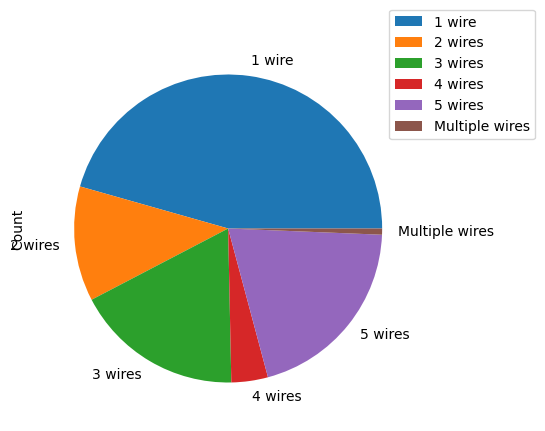

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a dictionary
data = {'1 wire': 1486, '2 wires': 393, '3 wires': 576, '4 wires': 125, '5 wires': 658, 'Multiple wires': 21}

# Create a pandas DataFrame
df = pd.DataFrame(data.items(), columns=['Number of Wires', 'Count'])

# Plot a pie chart
ax = df.plot.pie(y='Count', figsize=(5, 5), autopct='', labels=df['Number of Wires'], legend=True)
legend = ax.legend(loc="center left", bbox_to_anchor=(0.9,0.9), fontsize=10)

# Show the plot
plt.show()

In [5]:
df = pd.DataFrame(dic)
df

,1 wire,2 wires,3 wires,4 wires,5 wires,Multiple wires
0,1486,393,576,125,658,21


In [ ]:
data = df["#Images"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Air Termination System', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
df.plot(0='1 Wire', 1='#Images', kind='bar')

In [ ]:
print(one_wire)
print(two_wires)
print(three_wires)
print(four_wires)
print(five_wires)
print(Multi_wires)

# Analysis of the wire/background ratio

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

mask_path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Masks'
wire_background_ratio = []
# tip_background_ratio = []
os.listdir(mask_path)
for file in os.listdir(mask_path):
    filename = os.fsdecode(file)
    img = cv2.imread(mask_path+'\\'+filename , 0)
    b,w = 0,0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 255:
                w += 1
            if img[i,j] == 0:
                b += 1
    wire_ratio = (w/b)
#     tip_ratio = (t/b)
#     print(wire_ratio)
#     print(tip_ratio)
    wire_background_ratio.append(wire_ratio)
#     tip_background_ratio.append(tip_ratio)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array(wire_background_ratio)

plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Wire to background ratio');

In [ ]:
x = np.array(tip_background_ratio)

plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Tip to background ratio');

In [ ]:
from torchvision.io import read_image
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import albumentations as A
import random

image_path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images'
mask_path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images'

image = read_image(image_path)
mask = read_image(mask_path)

def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)
        
print(image.shape, mask.shape)
original_height, original_width = image.shape[:2]
visualize(image,mask)

In [ ]:
import numpy as np
import os
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2

image_path = os.chdir('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images')

for file in os.listdir(path):
    filename = os.fsdecode(file)
    image = cv2.imread(filename, 0)
    

In [ ]:
import numpy as np
import os
import pandas as pd 

path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\5 Layer Binary UNET\\Dataset\\output'

for i in range(5):
    one_wire, two_wires, three_wires, four_wires, five_wires, Multi_wires  = 0,0,0,0,0,0
    
    file = path+'\\validation_paths'+str(i)+'.txt'
    lines = open(file,'r').read().split('\n')
    for line in lines:
        filename = os.path.basename(line)
        ground = filename.replace('.PNG' , '.raw.csv')
        cells = pd.read_csv('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images\\'+ground, sep='\t', header=None , engine = 'python')
        if len(cells) == 1:
            one_wire += 1
        elif len(cells) == 2:
            two_wires += 1
        elif len(cells) == 3:
            three_wires += 1
        elif len(cells) == 4:
            four_wires += 1
        elif len(cells) == 5:
            five_wires += 1
        elif len(cells) > 5:
            Multi_wires += 1            
    print('The number of images with one wire in training fold {} is: {}'.format(i,one_wire))
    print('The number of images with two wires in training fold {} is: {}'.format(i,two_wires))
    print('The number of images with three wires in training fold {} is: {}'.format(i,three_wires))
    print('The number of images with four wires in training fold {} is: {}'.format(i,four_wires))
    print('The number of images with five wires in training fold {} is: {}'.format(i,five_wires))
    print('The number of images with Multi wires in training fold {} is: {}'.format(i,Multi_wires))
    print('************************************************************************')

In [1]:
import pandas as pd
import os
import numpy as np

directory = os.chdir('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images')

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        ground = os.fsdecode(filename)
        cells = pd.read_csv(ground, sep='\t', header=None , engine = 'python')
        cells[0] = cells[0] * (700/976)
        cells[1] = cells[1] * (700/976)
        cells[2] = cells[2] * (700/976)
        cells[3] = cells[3] * (700/976)
        
        cells = cells.round(0).astype(int)
        cells.to_csv('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\ground\\'+filename, header = False, index = False)